In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
df=pd.read_csv('drug.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [37]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [38]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [39]:
df.shape

(200, 6)

In [40]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


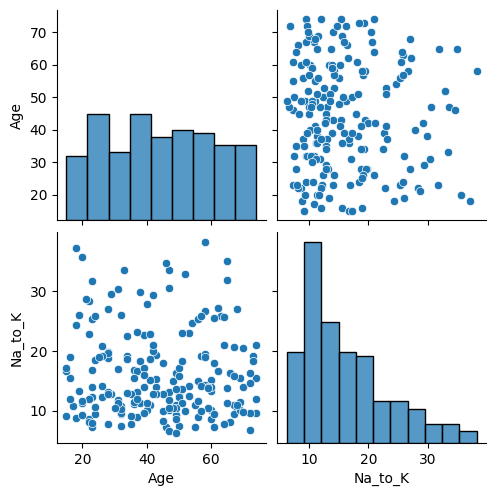

In [41]:
sns.pairplot(df)

(array([16., 22., 20., 20., 21., 28., 16., 23., 18., 16.]),
 array([15. , 20.9, 26.8, 32.7, 38.6, 44.5, 50.4, 56.3, 62.2, 68.1, 74. ]),
 <BarContainer object of 10 artists>)

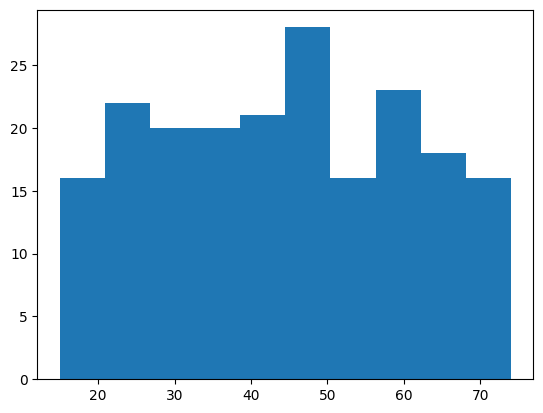

In [42]:
plt.hist(df['Age'])

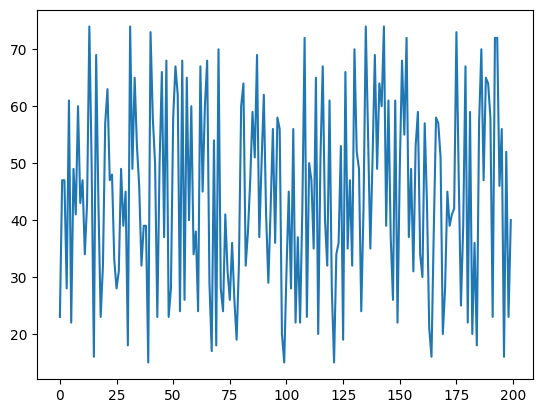

In [43]:
plt.plot(df['Age'])

In [44]:
df.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
195,False
196,False
197,False
198,False


In [45]:
x=df.drop('Drug',axis=1)
y=df['Drug']


In [46]:
x , y

(     Age Sex      BP Cholesterol  Na_to_K
 0     23   F    HIGH        HIGH   25.355
 1     47   M     LOW        HIGH   13.093
 2     47   M     LOW        HIGH   10.114
 3     28   F  NORMAL        HIGH    7.798
 4     61   F     LOW        HIGH   18.043
 ..   ...  ..     ...         ...      ...
 195   56   F     LOW        HIGH   11.567
 196   16   M     LOW        HIGH   12.006
 197   52   M  NORMAL        HIGH    9.894
 198   23   M  NORMAL      NORMAL   14.020
 199   40   F     LOW      NORMAL   11.349
 
 [200 rows x 5 columns],
 0      DrugY
 1      drugC
 2      drugC
 3      drugX
 4      DrugY
        ...  
 195    drugC
 196    drugC
 197    drugX
 198    drugX
 199    drugX
 Name: Drug, Length: 200, dtype: object)

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 5), (40, 5), (160,), (40,))

In [50]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [51]:
df['Drug'].value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [73]:
categorical_cols = ['Sex', 'BP', 'Cholesterol']

In [83]:
X_train_cat = encoder.fit_transform(x_train[categorical_cols])


In [85]:
X_test_cat = encoder.transform(x_test[categorical_cols])


In [86]:
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)


In [88]:
X_train_cat_df = pd.DataFrame(X_train_cat, columns=encoded_feature_names, index=x_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=encoded_feature_names, index=x_test.index)


In [90]:
X_train_num = x_train.drop(categorical_cols, axis=1)
X_test_num = x_test.drop(categorical_cols, axis=1)


In [91]:
X_train_final = pd.concat([X_train_num, X_train_cat_df], axis=1)
X_test_final = pd.concat([X_test_num, X_test_cat_df], axis=1)


In [92]:
X_train_final

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
79,32,10.840,0.0,1.0,0.0,1.0
197,52,9.894,1.0,0.0,1.0,0.0
38,39,9.709,0.0,0.0,1.0,1.0
24,33,33.486,0.0,1.0,0.0,0.0
122,34,22.456,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...
106,22,11.953,1.0,0.0,1.0,0.0
14,50,12.703,0.0,0.0,1.0,0.0
92,29,29.450,0.0,0.0,0.0,0.0
179,67,15.891,0.0,0.0,1.0,0.0


In [93]:
X_test_final

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
95,36,11.424,1.0,1.0,0.0,1.0
15,16,15.516,0.0,0.0,0.0,1.0
30,18,8.750,0.0,0.0,1.0,1.0
158,59,10.444,0.0,1.0,0.0,0.0
128,47,33.542,1.0,1.0,0.0,1.0
115,51,18.295,1.0,0.0,0.0,0.0
69,18,24.276,0.0,0.0,0.0,1.0
170,28,12.879,0.0,0.0,1.0,0.0
174,42,12.766,1.0,0.0,0.0,1.0
45,66,8.107,0.0,0.0,1.0,1.0


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [96]:
lr =LogisticRegression()

In [97]:
model=lr.fit(X_train_final,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
y_pred=model.predict(X_test_final)

In [101]:
score = accuracy_score(y_test, y_pred)
print("Accuracy:", score)

Accuracy: 0.9


In [102]:
report =classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       DrugY       0.79      1.00      0.88        15
       drugA       1.00      0.50      0.67         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.80      0.89         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.90        40
   macro avg       0.96      0.86      0.89        40
weighted avg       0.92      0.90      0.89        40



In [103]:
con=confusion_matrix(y_test,y_pred)
con

array([[15,  0,  0,  0,  0],
       [ 3,  3,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 1,  0,  0,  4,  0],
       [ 0,  0,  0,  0, 11]])

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)


Accuracy: 0.9
              precision    recall  f1-score   support

       DrugY       0.79      1.00      0.88        15
       drugA       1.00      0.50      0.67         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      0.80      0.89         5
       drugX       1.00      1.00      1.00        11

    accuracy                           0.90        40
   macro avg       0.96      0.86      0.89        40
weighted avg       0.92      0.90      0.89        40



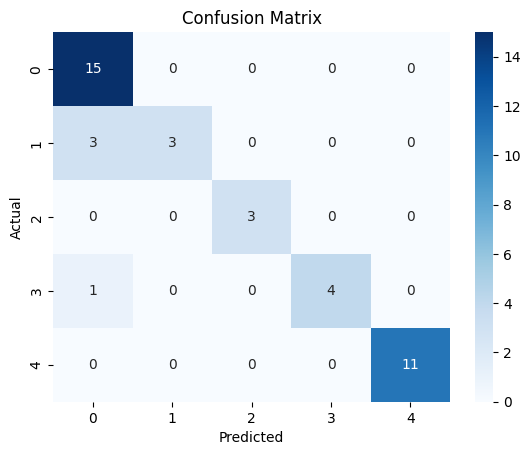

In [106]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
